In [ ]:
!pip install hdbscan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 36.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp39-cp39-linux_x86_64.whl size=3582078 sha256=c4d29ebbc9cee343c3b01339adfe282f9a7a7cfd5f0fafd6b1595fba61c8a2df
  Stored in directory: /root/.cache/pip/wheels/05/6f/88/1a4c04276b98306f00217a1e300e6ba0252c6aa4f7616067ae
Successfully built hdbscan


In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import numpy as np
import matplotlib.image as img
import hdbscan
from joblib import Memory
import seaborn as sns

# Import image
filename = '/content/20-3nonunif-600dpi.jpg'
img1 = cv2.imread(filename, 1)

# Read image
img_grey = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)


In [ ]:
# Define a threshold, 0.5 is the middle of black and white in grey scale
thresh = 0.5

# Threshold the image
img_binary = cv2.threshold(img_grey, thresh, 1, cv2.THRESH_BINARY)[1]

# Convert image to NumPy array
arr = np.asarray(img_binary)
ix = np.isin(arr, 1)
coordinates = []
for i in np.where(ix):
    coordinates.append(i)
coordinates = [(coordinates[1]),(coordinates[0])]
coordinates = np.asarray(coordinates)
coordinates = coordinates.T

In [ ]:
print(arr)

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


In [ ]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=2000, min_samples=50, metric='canberra', alpha=1.0, p=None, algorithm='best', leaf_size=100, approx_min_span_tree=True, gen_min_span_tree=True, core_dist_n_jobs=4, allow_single_cluster=True, match_reference_implementation=True)
clusterer.fit(coordinates)

ValueError: ignored

In [ ]:
labels = clusterer.labels_

In [ ]:
clusterer.labels_.max()

0

In [ ]:
prob=clusterer.probabilities_
prob.shape

(289200,)

In [ ]:
# Find the dense clusters
dense_labels = labels[np.where(prob)]
dense_labels

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as data
%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.1, 's' : 100, 'linewidths':0}
palette = sns.color_palette(palette=None, n_colors=20)

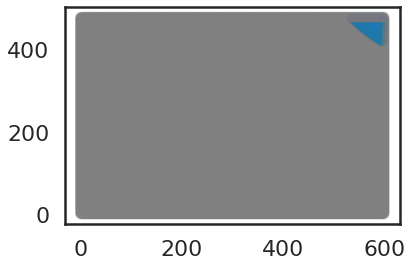

In [ ]:
cluster_colors = [sns.desaturate(palette[col], sat)
                  if col >= 0 else (0.5, 0.5, 0.5) for col, sat in
                  zip(clusterer.labels_, clusterer.probabilities_)]
                  
plt.scatter(coordinates.T[0], coordinates.T[1], c=cluster_colors, **plot_kwds)

In [ ]:
# Compute the number, size, and density of the dense clusters
num_clusters = len(set(dense_labels)) - (1 if -1 in dense_labels else 0)
sizes = [np.sum(dense_labels == i) for i in range(num_clusters)]
densities = [np.mean(prob[dense_labels]) for i in range(num_clusters)]
print(num_clusters)
print(sizes)
print(densities)

1
[2001]
[0.0]
